In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/kaggle/input/test-file/tested.csv")


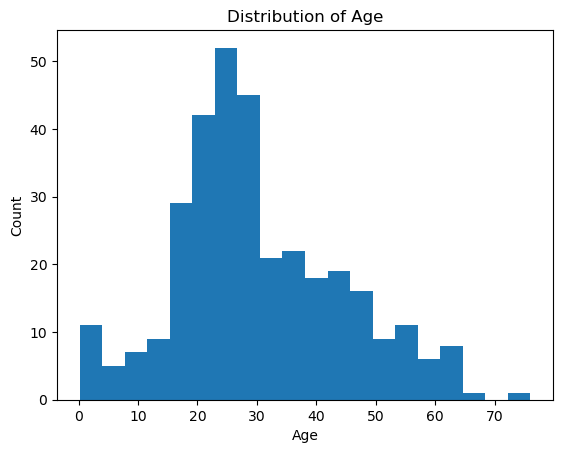

In [3]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.hist(data['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


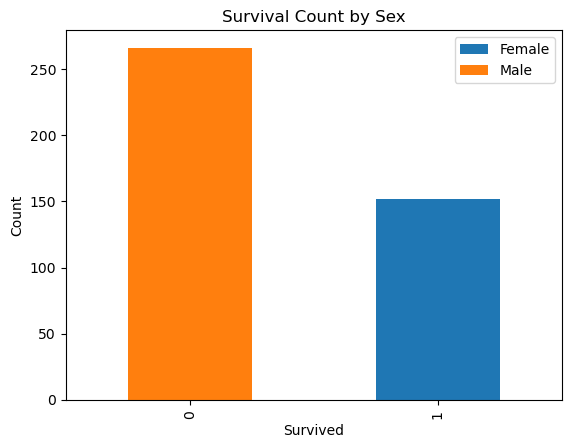

In [4]:
# Bar plot of Survived vs. Sex
survived_sex = data.groupby(['Survived', 'Sex']).size().unstack()
survived_sex.plot(kind='bar', stacked=True)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(['Female', 'Male'])
plt.show()


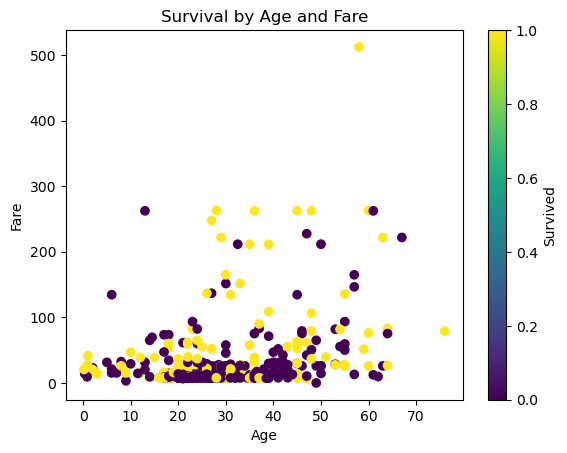

In [5]:
# Scatter plot of Age, Fare, and Survived
plt.scatter(data['Age'], data['Fare'], c=data['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Survival by Age and Fare')
plt.colorbar(label='Survived')
plt.show()


In [6]:
# Descriptive statistics
statistics = data.describe()
print(statistics)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [7]:
# Fill missing values in Age column with mean
data['Age'].fillna(data['Age'].mean(), inplace=True)


In [8]:
# Calculate upper whisker value
Q3 = data['Fare'].quantile(0.75)
IQR = 1.5 * (Q3 - data['Fare'].quantile(0.25))
upper_whisker = Q3 + IQR

# Replace outliers with upper whisker


In [9]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)


In [10]:
# Separate the target variable
X = data_encoded.drop('Survived', axis=1)  # Independent variables
y = data_encoded['Survived']  # Dependent variable


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the independent variables
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
